# Submission by: Ankita LNU; NetID: gb9655

#Q1b: Predict customers who purchase Caravan Insurance

In [1]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset

print(tf.__version__)

from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

UsageError: Line magic function `%tensorflow_version` not found.


#Data load

In [73]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

from numpy import loadtxt
linesT = loadtxt("ticdata2000.txt", comments="#", delimiter="\t", unpack=False)
linesV = loadtxt("ticeval2000.txt", comments="#", delimiter="\t", unpack=False)
linesTgt = loadtxt("tictgts2000.txt", comments="#", delimiter="\t", unpack=False)
#train_data = pd.read_excel('OnlineUse.xlsx', sheet_name="OnlineUseData")

print(linesT)
print(linesV)
print(linesTgt)

[[33.  1.  3. ...  0.  0.  0.]
 [37.  1.  2. ...  0.  0.  0.]
 [37.  1.  2. ...  0.  0.  0.]
 ...
 [33.  1.  3. ...  0.  0.  1.]
 [34.  1.  3. ...  0.  0.  0.]
 [33.  1.  3. ...  0.  0.  0.]]
[[33.  1.  4. ...  0.  0.  0.]
 [ 6.  1.  3. ...  0.  0.  0.]
 [39.  1.  3. ...  0.  0.  0.]
 ...
 [36.  1.  2. ...  0.  1.  0.]
 [33.  1.  3. ...  0.  0.  0.]
 [ 8.  1.  2. ...  0.  0.  0.]]
[0. 1. 0. ... 0. 0. 0.]


In [74]:
train_data = pd.DataFrame(data=linesT, index=None, columns=None) 
validation_data = pd.DataFrame(data=linesV, index=None, columns=None) 
target_data = pd.DataFrame(data=linesTgt, index=None, columns=None) 

In [75]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,33.0,1.0,3.0,2.0,8.0,0.0,5.0,1.0,3.0,7.0,0.0,2.0,1.0,2.0,6.0,1.0,2.0,7.0,1.0,0.0,1.0,2.0,5.0,2.0,1.0,1.0,2.0,6.0,1.0,1.0,8.0,8.0,0.0,1.0,8.0,1.0,0.0,4.0,5.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,1.0,4.0,6.0,2.0,2.0,0.0,4.0,5.0,0.0,5.0,4.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,2.0,3.0,5.0,0.0,2.0,7.0,7.0,1.0,2.0,6.0,3.0,2.0,0.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,5.0,0.0,4.0,0.0,7.0,2.0,7.0,0.0,2.0,9.0,0.0,4.0,5.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0,0.0,5.0,4.0,9.0,0.0,0.0,7.0,2.0,1.0,5.0,3.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,1.0,2.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,4.0,5.0,6.0,2.0,1.0,5.0,4.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
count,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,...,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0
mean,24.3,1.1,2.7,3.0,5.8,0.7,4.6,1.1,3.3,6.2,0.9,2.3,1.9,3.2,4.3,1.5,3.4,4.6,1.9,0.4,0.5,2.9,2.2,2.3,1.6,1.6,2.2,3.8,1.1,4.2,4.8,6.0,1.3,2.0,6.3,2.7,2.6,3.5,2.7,0.8,...,3.0,0.0,0.2,0.0,0.0,0.1,0.0,0.2,0.2,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.1
std,12.8,0.4,0.8,0.8,2.9,1.0,1.7,1.0,1.6,1.9,1.0,1.7,1.8,1.6,2.0,1.6,1.8,2.3,1.8,0.8,1.1,1.8,1.7,1.7,1.7,1.3,1.5,1.9,1.3,3.1,3.1,1.6,1.2,1.6,2.0,2.0,2.1,1.9,1.9,1.2,...,2.9,0.5,0.9,0.2,0.2,0.6,0.2,0.8,0.9,0.2,0.2,0.4,1.9,0.0,0.3,0.2,0.2,0.4,0.5,0.1,0.1,0.6,0.1,0.2,0.1,0.1,0.2,0.1,0.3,0.4,0.1,0.1,0.1,0.6,0.0,0.1,0.2,0.1,0.1,0.2
min,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,1.0,2.0,2.0,3.0,0.0,4.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,5.0,0.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,30.0,1.0,3.0,3.0,7.0,0.0,5.0,1.0,3.0,6.0,1.0,2.0,2.0,3.0,4.0,1.0,3.0,5.0,2.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,4.0,5.0,6.0,1.0,2.0,7.0,2.0,2.0,4.0,3.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,35.0,1.0,3.0,3.0,8.0,1.0,6.0,2.0,4.0,7.0,1.0,3.0,3.0,4.0,6.0,2.0,4.0,6.0,3.0,1.0,1.0,4.0,3.0,3.0,2.0,2.0,3.0,5.0,2.0,7.0,7.0,7.0,2.0,3.0,8.0,4.0,4.0,5.0,4.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,41.0,10.0,5.0,6.0,10.0,9.0,9.0,5.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,8.0,7.0,7.0,9.0,5.0,6.0,6.0,6.0,9.0,6.0,3.0,7.0,8.0,3.0,6.0,1.0,6.0,5.0,2.0,5.0,1.0,7.0,4.0,8.0,3.0,3.0,4.0,6.0,2.0,8.0,1.0,1.0,2.0,7.0,1.0,2.0,3.0,2.0,2.0,1.0


In [77]:
validation_data.describe() #same as training data except for missing Target column. 
#Find predicted target column for this dataset and compare with actuals

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
count,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,24.3,1.1,2.7,3.0,5.8,0.7,4.7,1.0,3.3,6.2,0.9,2.3,1.9,3.2,4.3,1.5,3.2,4.6,1.9,0.4,0.6,2.8,2.2,2.3,1.7,1.6,2.2,3.7,1.1,4.1,4.9,6.0,1.4,2.0,6.2,2.8,2.6,3.5,2.8,0.8,...,0.1,2.9,0.1,0.2,0.0,0.0,0.1,0.0,0.2,0.2,0.0,0.0,0.0,1.9,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0
std,13.0,0.4,0.8,0.8,2.9,1.0,1.7,1.0,1.6,1.9,1.0,1.7,1.7,1.6,2.0,1.7,1.7,2.3,1.8,0.8,1.2,1.9,1.8,1.7,1.8,1.3,1.5,2.0,1.3,3.1,3.1,1.5,1.2,1.6,2.0,2.0,2.1,1.9,2.0,1.2,...,0.5,2.9,0.6,0.9,0.2,0.2,0.6,0.2,0.8,0.9,0.2,0.2,0.4,1.9,0.1,0.2,0.2,0.2,0.4,0.5,0.1,0.1,0.6,0.1,0.2,0.1,0.1,0.3,0.1,0.3,0.4,0.1,0.1,0.1,0.6,0.0,0.1,0.2,0.1,0.1
min,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,5.0,0.0,0.0,5.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,30.0,1.0,3.0,3.0,7.0,0.0,5.0,1.0,3.0,6.0,1.0,2.0,2.0,3.0,4.0,1.0,3.0,5.0,2.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,4.0,5.0,6.0,1.0,2.0,7.0,2.0,2.0,3.0,3.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,35.0,1.0,3.0,3.0,8.0,1.0,6.0,2.0,4.0,7.0,1.0,3.0,3.0,4.0,6.0,2.0,4.0,6.0,3.0,1.0,1.0,4.0,3.0,3.0,2.0,2.0,3.0,5.0,2.0,7.0,8.0,7.0,2.0,3.0,8.0,4.0,4.0,5.0,4.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,41.0,10.0,6.0,6.0,10.0,9.0,9.0,5.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,4.0,9.0,7.0,6.0,7.0,3.0,7.0,6.0,6.0,7.0,5.0,3.0,7.0,8.0,2.0,5.0,1.0,6.0,5.0,2.0,1.0,1.0,12.0,5.0,3.0,4.0,2.0,6.0,4.0,3.0,5.0,1.0,1.0,1.0,6.0,1.0,2.0,4.0,1.0,1.0


In [78]:
target_data.describe() #this is the actual target column from validation_data

,0
count,4000.0
mean,0.1
std,0.2
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


#Data Preparation:
includes:
1. Utilizing Metadata information to map column names to each column
2. One-Hot encoding for 2 category columns i.e. Customer_subtype and Customer_maintype
3. Spliting into feature and target specific dataset

In [ ]:
#add column names to above dataset

In [79]:
train_data.columns = ['Cust_subtype', 'Num_Houses', 'Avg_Size_Household','Avg_Age', 'Cust_main_type', 
                       'Roman_cath', 'Protestant', 'Other_religion', 'No_religion', 'Married', 'Living_together',
                       'Other_relation', 'Singles', 'H_wo_children', 'H_w_children', 'H_level_edu', 'M_level_edu',
                       'L_level_edu', 'High_status', 'Entrepreneur', 'Farmer', 'Middle_management', 'Skilled_labourers',
                       'Unskilled_labourers', 'Social_class_A', 'Social_class_B1', 'Social_class_B2', 'Social_class_C', 'Social_class_D',
                       'Rented_house', 'Home_owners', '1_car', '2_car', 'No_car', 'Nat_health_Ser', 'Private_health_Insu',
                       'Income_less_30', 'Income_30-45', 'Income_45-75', 'Income_75-122', 'Income_more_123',
                       'Avg_Income', 'Purchasing_power_class', 'Contri_pvt_third_party_insu', 'Contri_third_party_insu_firms',
                       'Contri_third_party_insu_agri', 'Contri_car_policies', 'Contri_delivery_van_poli', 'Contri_motorcycle_scooter_poli',
                       'Contri_lorry_policies', 'Contri_trailer_policies', 'Contri_tractor_policies', 'Contri_agri_machine_poli',
                       'Contri_moped_policies', 'Contri_life_Insurance', 'C_pvt_accident_insur', 'C_family_accidents_insur',
                       'C_disability_insur_poli', 'Contri_fire_poli', 'Contri_surfboard_poli', 'Contri_boat_poli',
                       'Contri_bicycle_poli', 'Contri_property_insur_poli', 'C_social_security_insur_poli',
                       'Num_pvt_third_party_insurance', 'Num_third_party_insur_firms', 'Num_third_party_insur_agri', 'Num_car_poli',
                       'Num_delivery_van_poli', 'Num_motorcycle_scooter_poli', 'Num_lorry_policies', 'Num_trailer_policies', 'Num_tractor_policies', 
                       'Num_agri_machine_poli', 'Num_moped_policies', 'Num_life_Insurance', 'Num_pvt_accident_insur', 'Num_family_accidents_insur',
                       'Num_disability_insur_poli', 'Num_fire_poli', 'Num_surfboard_poli', 'Num_boat_poli',
                       'Num_bicycle_poli', 'Num_property_insur_poli', 'Num_social_security_insur_poli', 'CARAVAN_Num_mobile_home_poli']

In [80]:
train_data.head()

,Cust_subtype,Num_Houses,Avg_Size_Household,Avg_Age,Cust_main_type,Roman_cath,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,H_wo_children,H_w_children,H_level_edu,M_level_edu,L_level_edu,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Social_class_A,Social_class_B1,Social_class_B2,Social_class_C,Social_class_D,Rented_house,Home_owners,1_car,2_car,No_car,Nat_health_Ser,Private_health_Insu,Income_less_30,Income_30-45,Income_45-75,Income_75-122,...,Contri_car_policies,Contri_delivery_van_poli,Contri_motorcycle_scooter_poli,Contri_lorry_policies,Contri_trailer_policies,Contri_tractor_policies,Contri_agri_machine_poli,Contri_moped_policies,Contri_life_Insurance,C_pvt_accident_insur,C_family_accidents_insur,C_disability_insur_poli,Contri_fire_poli,Contri_surfboard_poli,Contri_boat_poli,Contri_bicycle_poli,Contri_property_insur_poli,C_social_security_insur_poli,Num_pvt_third_party_insurance,Num_third_party_insur_firms,Num_third_party_insur_agri,Num_car_poli,Num_delivery_van_poli,Num_motorcycle_scooter_poli,Num_lorry_policies,Num_trailer_policies,Num_tractor_policies,Num_agri_machine_poli,Num_moped_policies,Num_life_Insurance,Num_pvt_accident_insur,Num_family_accidents_insur,Num_disability_insur_poli,Num_fire_poli,Num_surfboard_poli,Num_boat_poli,Num_bicycle_poli,Num_property_insur_poli,Num_social_security_insur_poli,CARAVAN_Num_mobile_home_poli
0,33.0,1.0,3.0,2.0,8.0,0.0,5.0,1.0,3.0,7.0,0.0,2.0,1.0,2.0,6.0,1.0,2.0,7.0,1.0,0.0,1.0,2.0,5.0,2.0,1.0,1.0,2.0,6.0,1.0,1.0,8.0,8.0,0.0,1.0,8.0,1.0,0.0,4.0,5.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,1.0,4.0,6.0,2.0,2.0,0.0,4.0,5.0,0.0,5.0,4.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,2.0,3.0,5.0,0.0,2.0,7.0,7.0,1.0,2.0,6.0,3.0,2.0,0.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,5.0,0.0,4.0,0.0,7.0,2.0,7.0,0.0,2.0,9.0,0.0,4.0,5.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0,0.0,5.0,4.0,9.0,0.0,0.0,7.0,2.0,1.0,5.0,3.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,1.0,2.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,4.0,5.0,6.0,2.0,1.0,5.0,4.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
validation_data.columns = ['Cust_subtype', 'Num_Houses', 'Avg_Size_Household','Avg_Age', 'Cust_main_type', 
                       'Roman_cath', 'Protestant', 'Other_religion', 'No_religion', 'Married', 'Living_together',
                       'Other_relation', 'Singles', 'H_wo_children', 'H_w_children', 'H_level_edu', 'M_level_edu',
                       'L_level_edu', 'High_status', 'Entrepreneur', 'Farmer', 'Middle_management', 'Skilled_labourers',
                       'Unskilled_labourers', 'Social_class_A', 'Social_class_B1', 'Social_class_B2', 'Social_class_C', 'Social_class_D',
                       'Rented_house', 'Home_owners', '1_car', '2_car', 'No_car', 'Nat_health_Ser', 'Private_health_Insu',
                       'Income_less_30', 'Income_30-45', 'Income_45-75', 'Income_75-122', 'Income_more_123',
                       'Avg_Income', 'Purchasing_power_class', 'Contri_pvt_third_party_insu', 'Contri_third_party_insu_firms',
                       'Contri_third_party_insu_agri', 'Contri_car_policies', 'Contri_delivery_van_poli', 'Contri_motorcycle_scooter_poli',
                       'Contri_lorry_policies', 'Contri_trailer_policies', 'Contri_tractor_policies', 'Contri_agri_machine_poli',
                       'Contri_moped_policies', 'Contri_life_Insurance', 'C_pvt_accident_insur', 'C_family_accidents_insur',
                       'C_disability_insur_poli', 'Contri_fire_poli', 'Contri_surfboard_poli', 'Contri_boat_poli',
                       'Contri_bicycle_poli', 'Contri_property_insur_poli', 'C_social_security_insur_poli',
                       'Num_pvt_third_party_insurance', 'Num_third_party_insur_firms', 'Num_third_party_insur_agri', 'Num_car_poli',
                       'Num_delivery_van_poli', 'Num_motorcycle_scooter_poli', 'Num_lorry_policies', 'Num_trailer_policies', 'Num_tractor_policies', 
                       'Num_agri_machine_poli', 'Num_moped_policies', 'Num_life_Insurance', 'Num_pvt_accident_insur', 'Num_family_accidents_insur',
                       'Num_disability_insur_poli', 'Num_fire_poli', 'Num_surfboard_poli', 'Num_boat_poli',
                       'Num_bicycle_poli', 'Num_property_insur_poli', 'Num_social_security_insur_poli']

In [82]:
validation_data.head()

,Cust_subtype,Num_Houses,Avg_Size_Household,Avg_Age,Cust_main_type,Roman_cath,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,H_wo_children,H_w_children,H_level_edu,M_level_edu,L_level_edu,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Social_class_A,Social_class_B1,Social_class_B2,Social_class_C,Social_class_D,Rented_house,Home_owners,1_car,2_car,No_car,Nat_health_Ser,Private_health_Insu,Income_less_30,Income_30-45,Income_45-75,Income_75-122,...,Contri_third_party_insu_agri,Contri_car_policies,Contri_delivery_van_poli,Contri_motorcycle_scooter_poli,Contri_lorry_policies,Contri_trailer_policies,Contri_tractor_policies,Contri_agri_machine_poli,Contri_moped_policies,Contri_life_Insurance,C_pvt_accident_insur,C_family_accidents_insur,C_disability_insur_poli,Contri_fire_poli,Contri_surfboard_poli,Contri_boat_poli,Contri_bicycle_poli,Contri_property_insur_poli,C_social_security_insur_poli,Num_pvt_third_party_insurance,Num_third_party_insur_firms,Num_third_party_insur_agri,Num_car_poli,Num_delivery_van_poli,Num_motorcycle_scooter_poli,Num_lorry_policies,Num_trailer_policies,Num_tractor_policies,Num_agri_machine_poli,Num_moped_policies,Num_life_Insurance,Num_pvt_accident_insur,Num_family_accidents_insur,Num_disability_insur_poli,Num_fire_poli,Num_surfboard_poli,Num_boat_poli,Num_bicycle_poli,Num_property_insur_poli,Num_social_security_insur_poli
0,33.0,1.0,4.0,2.0,8.0,0.0,6.0,0.0,3.0,5.0,0.0,4.0,1.0,1.0,8.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,6.0,1.0,0.0,2.0,1.0,5.0,3.0,1.0,8.0,8.0,1.0,1.0,8.0,1.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,3.0,2.0,2.0,0.0,5.0,0.0,4.0,5.0,2.0,2.0,1.0,4.0,5.0,5.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,2.0,1.0,3.0,6.0,9.0,0.0,0.0,7.0,2.0,1.0,1.0,5.0,4.0,...,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,1.0,3.0,3.0,9.0,1.0,4.0,2.0,3.0,5.0,2.0,3.0,2.0,3.0,6.0,2.0,4.0,4.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,1.0,1.0,8.0,6.0,2.0,2.0,6.0,3.0,2.0,4.0,3.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0,1.0,1.0,5.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,3.0,6.0,7.0,2.0,1.0,7.0,2.0,2.0,5.0,3.0,1.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31.0,1.0,2.0,4.0,7.0,0.0,2.0,0.0,7.0,9.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,0.0,7.0,2.0,9.0,0.0,7.0,2.0,0.0,9.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
target_data.columns = ['CARAVAN_Num_mobile_home_poli'] 

In [84]:
target_data.head()

,CARAVAN_Num_mobile_home_poli
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


OneHot encoding for category columns - Cust_subtype and Cust_main_type

In [85]:
train_data = pd.get_dummies(train_data, prefix=['Cust_subtype', 'Cust_main_type'], columns=['Cust_subtype', 'Cust_main_type'])

In [86]:
validation_data = pd.get_dummies(validation_data, prefix=['Cust_subtype', 'Cust_main_type'], columns=['Cust_subtype', 'Cust_main_type'])

In [87]:
validation_data.head()

,Num_Houses,Avg_Size_Household,Avg_Age,Roman_cath,Protestant,Other_religion,No_religion,Married,Living_together,Other_relation,Singles,H_wo_children,H_w_children,H_level_edu,M_level_edu,L_level_edu,High_status,Entrepreneur,Farmer,Middle_management,Skilled_labourers,Unskilled_labourers,Social_class_A,Social_class_B1,Social_class_B2,Social_class_C,Social_class_D,Rented_house,Home_owners,1_car,2_car,No_car,Nat_health_Ser,Private_health_Insu,Income_less_30,Income_30-45,Income_45-75,Income_75-122,Income_more_123,Avg_Income,...,Cust_subtype_11.0,Cust_subtype_12.0,Cust_subtype_13.0,Cust_subtype_15.0,Cust_subtype_16.0,Cust_subtype_17.0,Cust_subtype_18.0,Cust_subtype_19.0,Cust_subtype_20.0,Cust_subtype_21.0,Cust_subtype_22.0,Cust_subtype_23.0,Cust_subtype_24.0,Cust_subtype_25.0,Cust_subtype_26.0,Cust_subtype_27.0,Cust_subtype_28.0,Cust_subtype_29.0,Cust_subtype_30.0,Cust_subtype_31.0,Cust_subtype_32.0,Cust_subtype_33.0,Cust_subtype_34.0,Cust_subtype_35.0,Cust_subtype_36.0,Cust_subtype_37.0,Cust_subtype_38.0,Cust_subtype_39.0,Cust_subtype_40.0,Cust_subtype_41.0,Cust_main_type_1.0,Cust_main_type_2.0,Cust_main_type_3.0,Cust_main_type_4.0,Cust_main_type_5.0,Cust_main_type_6.0,Cust_main_type_7.0,Cust_main_type_8.0,Cust_main_type_9.0,Cust_main_type_10.0
0,1.0,4.0,2.0,0.0,6.0,0.0,3.0,5.0,0.0,4.0,1.0,1.0,8.0,2.0,2.0,6.0,0.0,0.0,1.0,2.0,6.0,1.0,0.0,2.0,1.0,5.0,3.0,1.0,8.0,8.0,1.0,1.0,8.0,1.0,3.0,3.0,3.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,3.0,2.0,0.0,5.0,0.0,4.0,5.0,2.0,2.0,1.0,4.0,5.0,5.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,2.0,1.0,3.0,6.0,9.0,0.0,0.0,7.0,2.0,1.0,1.0,5.0,4.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.0,3.0,3.0,1.0,4.0,2.0,3.0,5.0,2.0,3.0,2.0,3.0,6.0,2.0,4.0,4.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,1.0,1.0,8.0,6.0,2.0,2.0,6.0,3.0,2.0,4.0,3.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,2.0,3.0,2.0,3.0,2.0,4.0,5.0,4.0,1.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0,1.0,1.0,5.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,3.0,6.0,7.0,2.0,1.0,7.0,2.0,2.0,5.0,3.0,1.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,2.0,4.0,0.0,2.0,0.0,7.0,9.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,0.0,7.0,2.0,9.0,0.0,7.0,2.0,0.0,9.0,0.0,5.0,4.0,0.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
train_data_features = train_data.drop(['CARAVAN_Num_mobile_home_poli'],axis=1) #this will now have 133 columns

In [89]:
train_data_target = pd.DataFrame(train_data['CARAVAN_Num_mobile_home_poli']) #just one target column from training dataset

In [90]:
train_data_target

,CARAVAN_Num_mobile_home_poli
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5817,0.0
5818,0.0
5819,1.0
5820,0.0


In [91]:
train_data_target['CARAVAN_Num_mobile_home_poli'].value_counts()

0.0    5474
1.0     348
Name: CARAVAN_Num_mobile_home_poli, dtype: int64

In [92]:
#Percentage of customers with CARAVAN Insurance
#target_percentage =  (train_data_target['CARAVAN_Num_mobile_home_poli'].value_counts()/train_data_target['CARAVAN_Num_mobile_home_poli'].count())
#target_percentage

neg, pos = np.bincount(train_data_target['CARAVAN_Num_mobile_home_poli'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total)) #This shows small fraction of positive samples that have Caravan Insurance.

Examples:
    Total: 5822
    Positive: 348 (5.98% of total)



#Baseline Model
Naive Bayes is the Baseline model in this scenario. It will predict the majority class as the output which is Customers with no CARAVAN insurance for all rows. However, we know that 5.98% customers have CARAVAN Insurance. Hence, recall being 0%.

We are considering recall here which helps us answer following question - What proportion of actual customers with Insurance were identified correctly? For baseline model, none of the customers were rightly classified to have CARAVAN insurance. Similarly accuracy will not provide the correct picture because it will give both Total positive and total negative cases and here Total negative cases i.e. customers with negative insurance will be huge because of the imbalance in class. Hence, accuracy will be dominated by the dominant class and is not the right measure to understand model fit.

In [93]:
validation_data_features = validation_data

In [94]:
validation_data_target = target_data

In [95]:
validation_data_target


,CARAVAN_Num_mobile_home_poli
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3995,0.0
3996,1.0
3997,0.0
3998,0.0


#Data Modeling
This business question is about predicting customers who have CARAVAN insurance. It's about a binary output either yes or no. Hence the hyperparameters that we choose for modeling are as under:
1. One neuron in output layer as we need one output
2. Sigmoid Activation factor as output is binary i.e. it follows bernoulli distribution.
3. binary_crossentropy as cost function because we have only two label classes (0 and 1)
4. sgd as optimizer
5. multiple metrics as we want to understand the number of true positive, true negative, recall etc. These consufion matrix measures will help us evaluate the best model.

# Created 4 different models:
1. Model on imbalance class dataset to showcase the hypothesis outlined above
2. Model with class weights to handle Imbalance of classes
3. Model with Regularization - L1 and L2
*   3a. L2 Regularization
*   3b. L1 Regularization (BEST MODEL)



# 1. Model on imbalance class dataset to showcase the hypothesis outlined above

In [383]:
tf.keras.backend.clear_session()

simple_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, #first hidden layer with 16 neurons
                       input_shape=(train_data_features.shape[1],)), 
    keras.layers.Dense(16, activation=tf.nn.relu,), #this would be second hidden layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #as output is binary, this is bernoulli distribution. 
                                                    #Hence we use sigmoid AF for output layer 
    
  ])

#compiling model
simple_model.compile(loss='binary_crossentropy', #binary_crossentropy as cost function
                optimizer='sgd', #optimization algo (stochastic gradient descent) worked best when compared with relu, tanh and adam
                metrics=[ keras.metrics.TruePositives(name='tp'),
                          keras.metrics.FalsePositives(name='fp'),
                          keras.metrics.TrueNegatives(name='tn'),
                          keras.metrics.FalseNegatives(name='fn'), 
                          keras.metrics.BinaryAccuracy(name='accuracy'),
                          keras.metrics.Precision(name='precision'),
                          keras.metrics.Recall(name='recall'),
                          keras.metrics.AUC(name='auc'),]) #tells us how do we wanna evaluate the results
simple_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2144      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [384]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200 
s_history = simple_model.fit(train_data_features, train_data_target, epochs=EPOCHS,
                    validation_data= (validation_data_features, validation_data_target), verbose=0,
                    callbacks=[PrintDot()])




....................................................................................................
....................................................................................................

In [385]:
hist = pd.DataFrame(s_history.history)
hist['epoch'] = s_history.epoch
hist.tail()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epoch
195,0.2,22.0,11.0,5463.0,326.0,0.9,0.7,0.1,0.9,0.2,10.0,15.0,3747.0,228.0,0.9,0.4,0.0,0.7,195
196,0.2,23.0,17.0,5457.0,325.0,0.9,0.6,0.1,0.9,0.2,14.0,29.0,3733.0,224.0,0.9,0.3,0.1,0.7,196
197,0.2,18.0,10.0,5464.0,330.0,0.9,0.6,0.1,0.9,0.2,7.0,7.0,3755.0,231.0,0.9,0.5,0.0,0.7,197
198,0.2,24.0,13.0,5461.0,324.0,0.9,0.6,0.1,0.9,0.2,3.0,6.0,3756.0,235.0,0.9,0.3,0.0,0.7,198
199,0.2,17.0,15.0,5459.0,331.0,0.9,0.5,0.0,0.9,0.2,9.0,15.0,3747.0,229.0,0.9,0.4,0.0,0.7,199


Classification report below helps us understand that class 1 "with CARAVAN insurance" is not being predicted. Similarly in the table above with history of epoch runs, you can observe that val_tp are just 9 while val_tn number is huge.Accuracy, recall scores are dominated by the 0 class. Hence we will have to balance the classes and remodel

In [387]:
from sklearn.metrics import classification_report

y_pred = simple_model.predict(validation_data_features, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
#print(y_pred_bool.type())

v = validation_data_target['CARAVAN_Num_mobile_home_poli'].to_numpy()
print(v)

print(classification_report(v, y_pred_bool))

63/63 [==============================] - 0s 1ms/step
[0. 1. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3762
         1.0       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [388]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['predicted']
y_pred

,predicted
0,0.0
1,0.5
2,0.3
3,0.2
4,0.0
...,...
3995,0.0
3996,0.1
3997,0.3
3998,0.2


In [389]:
cutoff=0.50

df = validation_data_target
df['y_true'] = validation_data_target['CARAVAN_Num_mobile_home_poli'] #class as integer
df['y_pred'] = [1 if p > cutoff else 0 for p in y_pred['predicted']] 
df

,CARAVAN_Num_mobile_home_poli,y_true,y_pred
0,0.0,0.0,0
1,1.0,1.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0
...,...,...,...
3995,0.0,0.0,0
3996,1.0,1.0,0
3997,0.0,0.0,0
3998,0.0,0.0,0


In [390]:
x=df[df['CARAVAN_Num_mobile_home_poli'] == 1.0] #only 9 cases were rightly predicted to have CARAVAN insurance 

y = x[x['y_pred']==1.0]
print(y.shape)

(9, 3)


In [391]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0,1])
    else:
      plt.ylim([0,1])

    plt.legend()


Below 4 charts highlighting loss, auc, precision and recall are too off. Validation is not following training data trend.

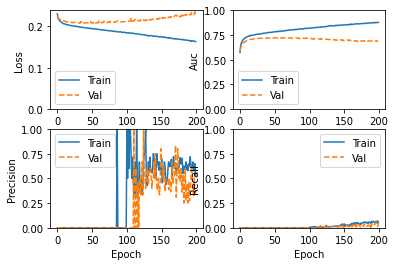

In [392]:
plot_metrics(s_history)

In [393]:
import statistics 
print(statistics.mean(hist['val_recall']))
print(max(hist['val_recall'])) #only 9 cases were rightly identified
print(statistics.mean(hist['val_auc'])) #dominated by true negatives
print(statistics.mean(hist['val_precision']))

0.00743697501020506
0.05882352963089943
0.7051749315857887
0.21565761685371398


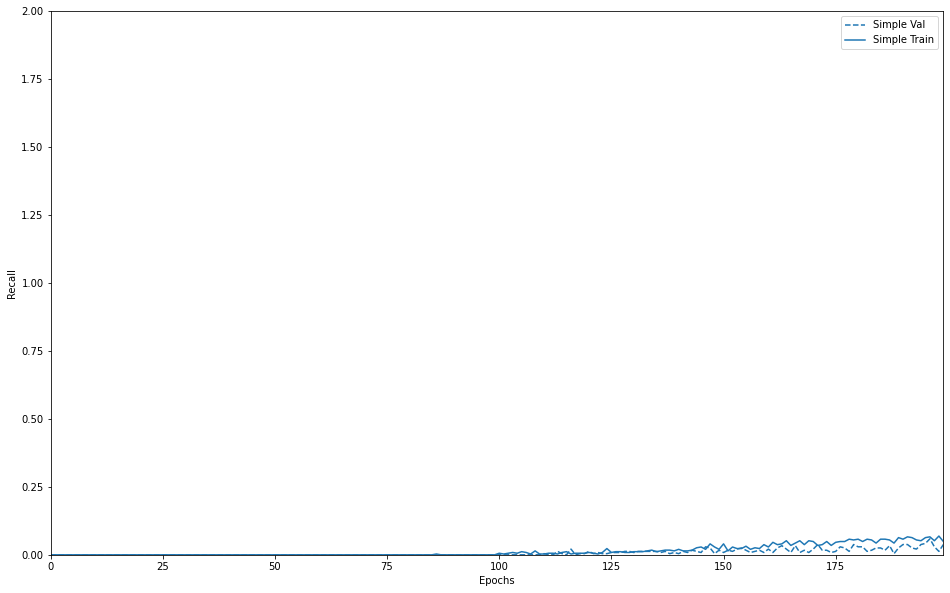

In [394]:
import matplotlib.pyplot as plt


def plot_history(histories, key='recall'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,2])

plot_history([('simple', s_history)])

# 2. Model with class weights to handle Imbalance of classes
Below model utilizes few additional hyperparameters besides the ones specified earlier:
1. Class_weights to provide more weight to less dominat class. This will help to train the model better
2. kernel_constrains = maxnorm() to constrain the weights incident to each hidden unit to have a norm less than or equal to a desired value i.e. 5.
3. Sgd - learning rate and momentum to allow slow learning and minimize ill-conditioning
4. dropouts - to train on small datasets and capture better variations

In [395]:
y = train_data_target.to_numpy()
y.shape
type(y)

numpy.ndarray

In [396]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y,order='C')),
                                                 np.ravel(y,order='C'))

In [397]:
class_weights

array([0.53178663, 8.36494253])

In [398]:
class_weights1 = dict(enumerate(class_weights))
class_weights1

{0: 0.5317866276945561, 1: 8.364942528735632}

In [399]:
from keras.constraints import maxnorm

In [410]:
tf.keras.backend.clear_session()

weight_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, kernel_constraint=maxnorm(5),#first hidden layer with 16 neurons
                       input_shape=(train_data_features.shape[1],)), 
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5)), #this would be second hidden layer
   # keras.layers.GaussianNoise(0.1),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5)), 
    keras.layers.Dropout(0.25),
    #keras.layers.Dense(16, activation=tf.nn.relu,), #this would be second hidden layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #as output is binary, this is bernoulli distribution. 
                                                    #Hence we use sigmoid AF for output layer
  ])

#compiling model
from keras.optimizers import SGD
sgd = SGD(lr=0.005, momentum=0.90, decay=0.0)
weight_model.compile(loss='binary_crossentropy', 
                optimizer=sgd, 
                metrics=[ keras.metrics.TruePositives(name='tp'),
                          keras.metrics.FalsePositives(name='fp'),
                          keras.metrics.TrueNegatives(name='tn'),
                          keras.metrics.FalseNegatives(name='fn'), 
                          keras.metrics.BinaryAccuracy(name='accuracy'),
                          keras.metrics.Precision(name='precision'),
                          keras.metrics.Recall(name='recall'),
                          keras.metrics.AUC(name='auc'),]) #tells us how do we wanna evaluate the results
weight_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2144      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
______________________________________________________

In [411]:
validation_data_target = pd.DataFrame(validation_data_target['CARAVAN_Num_mobile_home_poli'])
validation_data_target

,CARAVAN_Num_mobile_home_poli
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3995,0.0
3996,1.0
3997,0.0
3998,0.0


In [412]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor='val_recall', 
#    verbose=1,
#    patience=10,
#    mode='max',
#    restore_best_weights=True)

EPOCHS = 100 
w_history = weight_model.fit(train_data_features, train_data_target, epochs=EPOCHS, class_weight=class_weights1,
                    validation_data= (validation_data_features, validation_data_target), verbose=0, batch_size=100,
                    callbacks = [PrintDot()])
#                    callbacks = [early_stopping])




....................................................................................................

In [413]:
hist_w = pd.DataFrame(w_history.history)
hist_w['epoch'] = w_history.epoch
hist_w.tail()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epoch
95,0.6,250.0,1953.0,3521.0,98.0,0.6,0.1,0.7,0.7,0.5,122.0,891.0,2871.0,116.0,0.7,0.1,0.5,0.7,95
96,0.6,239.0,1661.0,3813.0,109.0,0.7,0.1,0.7,0.8,0.6,173.0,1598.0,2164.0,65.0,0.6,0.1,0.7,0.7,96
97,0.6,258.0,1911.0,3563.0,90.0,0.7,0.1,0.7,0.8,0.6,182.0,1830.0,1932.0,56.0,0.5,0.1,0.8,0.7,97
98,0.6,276.0,1948.0,3526.0,72.0,0.7,0.1,0.8,0.8,0.5,131.0,1030.0,2732.0,107.0,0.7,0.1,0.6,0.7,98
99,0.6,256.0,1820.0,3654.0,92.0,0.7,0.1,0.7,0.8,0.5,141.0,1043.0,2719.0,97.0,0.7,0.1,0.6,0.7,99


In [414]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0,1])
    else:
      plt.ylim([0,1])

    plt.legend()


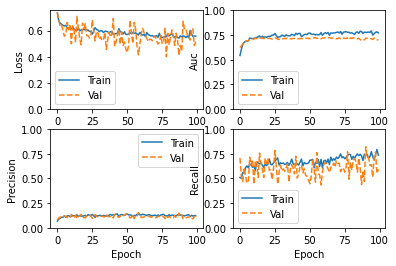

In [415]:
plot_metrics(w_history)

In [416]:
import statistics 
print(statistics.mean(hist_w['val_recall']))
print(max(hist_w['val_recall']))
print(statistics.mean(hist_w['val_auc']))
print(statistics.mean(hist_w['val_precision']))

0.6014285796880722
0.819327712059021
0.7115505939722061
0.11333727613091468


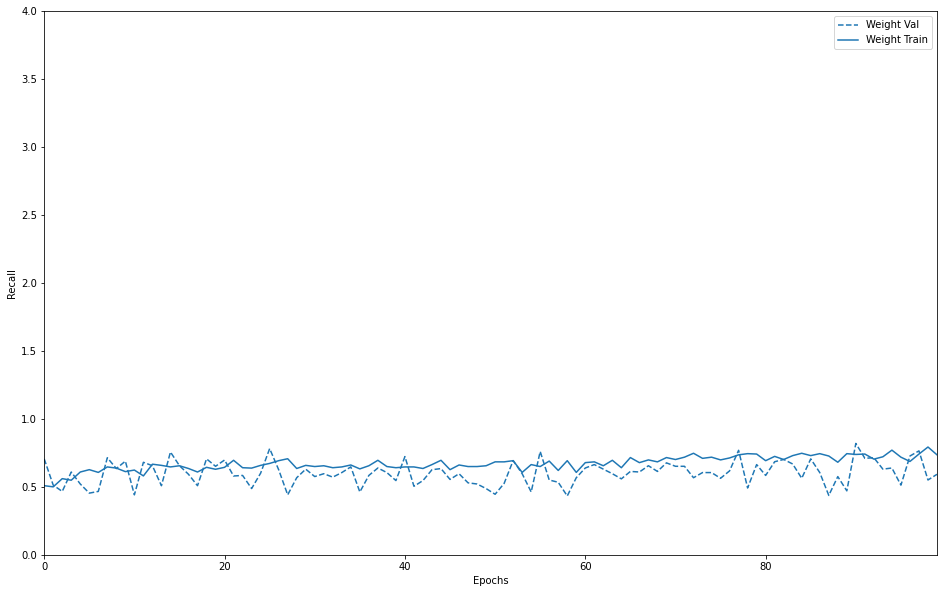

In [417]:
import matplotlib.pyplot as plt


def plot_history(histories, key='recall'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,4])

plot_history([('weight', w_history)])

#Model explanation:
Dense neural network with kernel constraints, class weights and dropouts. For this model has imbalanced classes where the class to be predicted was present in minority hence accuracy was not taken as the right measure. I rather used 'Recall' which helps us answer following question - What proportion of actual customers with Insurance were identified correctly? So with this we can saw that 60% of actual customers with insurance were predicted correctly.

To be able to fit the model I have used learning rate and momentum and decay to allow model to learn slowly with decay plus momentum to manage ill-fitting of data. Kernel-Constraints were used to provide an upper bound limit to weights (maxnorm). Plus used dropout layer to train lot of small networks to work like an ensemble technique. Further, I have taken larger batch size to add regularization effect, this model was slow at learning and hence I increased the batch size to 100.

# 3. Model with Regularization - L1 and L2 
to further improve above model which has class weights to provide more emphasis on minority class i.e. Customers with CARAVAN insurance.

**3a. L2 regularization**

In [1]:
from keras.constraints import maxnorm

In [418]:
tf.keras.backend.clear_session()

l2_model = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5),
                       kernel_regularizer=keras.regularizers.l2(0.1), 
                       input_shape=(train_data_features.shape[1],)), 
  #  keras.layers.GaussianNoise(0.1),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5),kernel_regularizer=keras.regularizers.l2(0.1)), #this would be second hidden layer
   # keras.layers.GaussianNoise(0.1),
    keras.layers.Dropout(0.25),
   # keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5), kernel_regularizer=keras.regularizers.l2(0.1)), #this would be second hidden layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid) 
    
  ])

#compiling model
from keras.optimizers import SGD
#sgd = SGD(lr=0.01, momentum=0.9, decay=0.0)
l2_model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=[ keras.metrics.TruePositives(name='tp'),
                          keras.metrics.FalsePositives(name='fp'),
                          keras.metrics.TrueNegatives(name='tn'),
                          keras.metrics.FalseNegatives(name='fn'), 
                          keras.metrics.BinaryAccuracy(name='accuracy'),
                          keras.metrics.Precision(name='precision'),
                          keras.metrics.Recall(name='recall'),
                          keras.metrics.AUC(name='auc'),]) #tells us how do we wanna evaluate the results
l2_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1072      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [419]:
validation_data_target = pd.DataFrame(validation_data_target['CARAVAN_Num_mobile_home_poli'])
validation_data_target

,CARAVAN_Num_mobile_home_poli
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3995,0.0
3996,1.0
3997,0.0
3998,0.0


In [420]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor='val_recall', 
#    verbose=1,
#    patience=10,
#    mode='max',
#    restore_best_weights=True)

EPOCHS = 100 
l2_history = l2_model.fit(train_data_features, train_data_target, epochs=EPOCHS, class_weight=class_weights1,
                    validation_data= (validation_data_features, validation_data_target), verbose=0, batch_size=100,
                    callbacks = [PrintDot()])
#                    callbacks = [early_stopping])




....................................................................................................

In [421]:
hist_l2 = pd.DataFrame(l2_history.history)
hist_l2['epoch'] = l2_history.epoch
hist_l2.tail()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epoch
95,0.6,254.0,2078.0,3396.0,94.0,0.6,0.1,0.7,0.7,0.6,147.0,1255.0,2507.0,91.0,0.7,0.1,0.6,0.7,95
96,0.6,246.0,2041.0,3433.0,102.0,0.6,0.1,0.7,0.7,0.5,108.0,683.0,3079.0,130.0,0.8,0.1,0.5,0.7,96
97,0.6,236.0,1998.0,3476.0,112.0,0.6,0.1,0.7,0.7,0.9,211.0,2420.0,1342.0,27.0,0.4,0.1,0.9,0.7,97
98,0.7,244.0,2187.0,3287.0,104.0,0.6,0.1,0.7,0.7,0.5,106.0,616.0,3146.0,132.0,0.8,0.1,0.4,0.7,98
99,0.6,243.0,1943.0,3531.0,105.0,0.6,0.1,0.7,0.7,0.6,146.0,1222.0,2540.0,92.0,0.7,0.1,0.6,0.7,99


In [422]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0,1])
    else:
      plt.ylim([0,1])

    plt.legend()


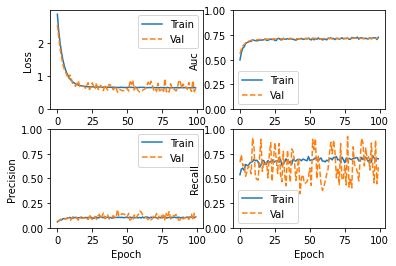

In [423]:
plot_metrics(l2_history)

In [424]:
import statistics 
print(statistics.mean(hist_l2['val_recall']))
print(max(hist_l2['val_recall']))
print(statistics.mean(hist_l2['val_auc']))
print(statistics.mean(hist_l2['val_precision']))

0.6287815144658089
0.924369752407074
0.7077722650766373
0.10906503722071648


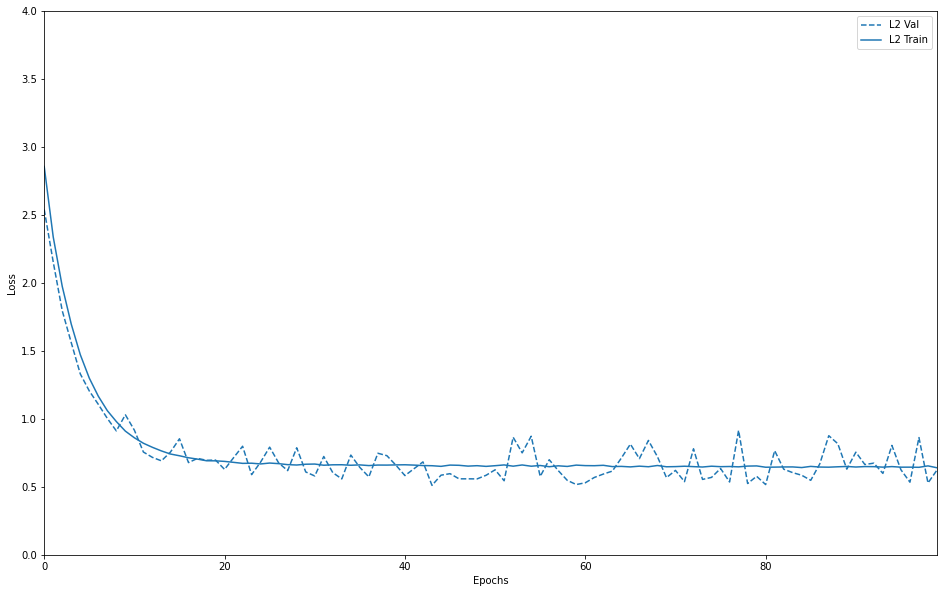

In [428]:
import matplotlib.pyplot as plt


def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,4])

plot_history([('l2', l2_history)])

L2 model explanation:
Overall recall and accuracy metrics are better with L2 regularization, however, if we look at the plots there seems to be ill-conditioning. Recall is oscillating a lot across epochs. Also, if we plot loss vs, epoch-error seems to be oscillating too. L2 regularization is not helping model to capture the trend correctly. Hence, we will try L1 regularization.

# BEST MODEL
**3b. L1 regularization**

In [367]:
tf.keras.backend.clear_session()

l1_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, kernel_constraint=maxnorm(5),
                       kernel_regularizer=keras.regularizers.l1(0.01), 
                       input_shape=(train_data_features.shape[1],)), 
  #  keras.layers.GaussianNoise(0.1),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5),kernel_regularizer=keras.regularizers.l1(0.01)),
  #  keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_constraint=maxnorm(5),kernel_regularizer=keras.regularizers.l1(0.01)), 
  #  #keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation=tf.nn.sigmoid) 
    
  ])

#compiling model
from keras.optimizers import SGD
sgd = SGD(lr=0.001, momentum=0.40, decay=0.0)
l1_model.compile(loss='binary_crossentropy', 
                optimizer=sgd, 
                metrics=[ keras.metrics.TruePositives(name='tp'),
                          keras.metrics.FalsePositives(name='fp'),
                          keras.metrics.TrueNegatives(name='tn'),
                          keras.metrics.FalseNegatives(name='fn'), 
                          keras.metrics.BinaryAccuracy(name='accuracy'),
                          keras.metrics.Precision(name='precision'),
                          keras.metrics.Recall(name='recall'),
                          keras.metrics.AUC(name='auc'),]) #tells us how do we wanna evaluate the results
l1_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2144      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
_________________________________________________________________


In [368]:
validation_data_target = pd.DataFrame(validation_data_target['CARAVAN_Num_mobile_home_poli'])
validation_data_target

,CARAVAN_Num_mobile_home_poli
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
3995,0.0
3996,1.0
3997,0.0
3998,0.0


In [369]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor='val_recall', 
#    verbose=1,
#    patience=10,
#    mode='max',
#    restore_best_weights=True)

EPOCHS = 100 
l1_history = l1_model.fit(train_data_features, train_data_target, epochs=EPOCHS, class_weight=class_weights1,
                    validation_data= (validation_data_features, validation_data_target), verbose=2, batch_size=100,
                    callbacks = [PrintDot()])
#                    callbacks = [early_stopping])



Epoch 1/100

.59/59 - 1s - loss: 3.3189 - tp: 41.0000 - fp: 1028.0000 - tn: 4446.0000 - fn: 307.0000 - accuracy: 0.7707 - precision: 0.0384 - recall: 0.1178 - auc: 0.4183 - val_loss: 3.3001 - val_tp: 101.0000 - val_fp: 2155.0000 - val_tn: 1607.0000 - val_fn: 137.0000 - val_accuracy: 0.4270 - val_precision: 0.0448 - val_recall: 0.4244 - val_auc: 0.4174
Epoch 2/100
.59/59 - 0s - loss: 3.2956 - tp: 158.0000 - fp: 3055.0000 - tn: 2419.0000 - fn: 190.0000 - accuracy: 0.4426 - precision: 0.0492 - recall: 0.4540 - auc: 0.4306 - val_loss: 3.2782 - val_tp: 108.0000 - val_fp: 2267.0000 - val_tn: 1495.0000 - val_fn: 130.0000 - val_accuracy: 0.4008 - val_precision: 0.0455 - val_recall: 0.4538 - val_auc: 0.4337
Epoch 3/100
.59/59 - 0s - loss: 3.2724 - tp: 178.0000 - fp: 3342.0000 - tn: 2132.0000 - fn: 170.0000 - accuracy: 0.3968 - precision: 0.0506 - recall: 0.5115 - auc: 0.4436 - val_loss: 3.2563 - val_tp: 121.0000 - val_fp: 2360.0000 - val_tn: 1402.0000 - val_fn: 117.0000 - val_accuracy: 0.3808 -

In [370]:
hist_l1 = pd.DataFrame(l1_history.history)
hist_l1['epoch'] = l1_history.epoch
hist_l1.tail()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epoch
95,1.6,292.0,2970.0,2504.0,56.0,0.5,0.1,0.8,0.7,1.6,189.0,1992.0,1770.0,49.0,0.5,0.1,0.8,0.7,95
96,1.6,291.0,2894.0,2580.0,57.0,0.5,0.1,0.8,0.7,1.6,189.0,2005.0,1757.0,49.0,0.5,0.1,0.8,0.7,96
97,1.6,292.0,2900.0,2574.0,56.0,0.5,0.1,0.8,0.7,1.6,187.0,1962.0,1800.0,51.0,0.5,0.1,0.8,0.7,97
98,1.5,288.0,2837.0,2637.0,60.0,0.5,0.1,0.8,0.7,1.6,191.0,2027.0,1735.0,47.0,0.5,0.1,0.8,0.7,98
99,1.5,286.0,2817.0,2657.0,62.0,0.5,0.1,0.8,0.7,1.6,191.0,2056.0,1706.0,47.0,0.5,0.1,0.8,0.7,99


In [371]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0,1])
    else:
      plt.ylim([0,1])

    plt.legend()


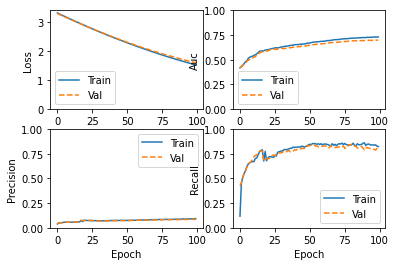

In [372]:
plot_metrics(l1_history)

In [373]:
import statistics 
print(statistics.mean(hist_l1['val_recall']))
print(max(hist_l1['val_recall']))
print(statistics.mean(hist_l1['val_auc']))
print(statistics.mean(hist_l1['val_precision']))

0.7712605002522469
0.8445377945899963
0.6299894687533378
0.0733373836427927


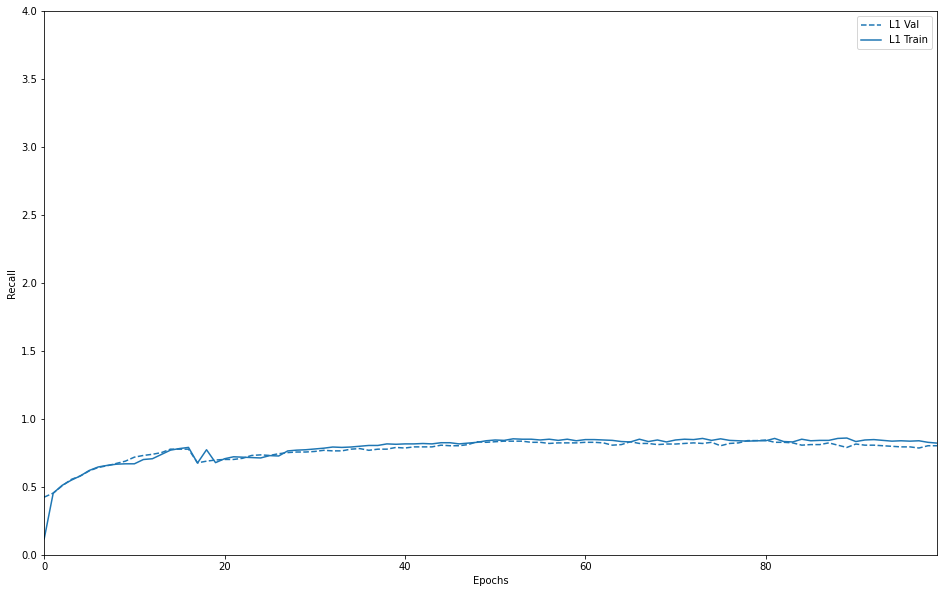

In [378]:
import matplotlib.pyplot as plt


def plot_history(histories, key='recall'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,4])

plot_history([('l1', l1_history)])

<BarContainer object of 16 artists>

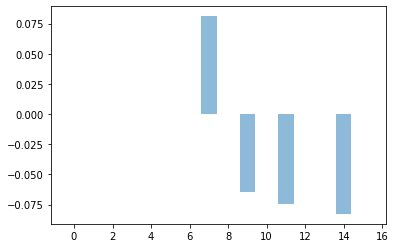

In [379]:
# Plot Weights
nfw = l1_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

With L1 regularization, I added sgd learning rate and momentum. Kept both of them low so as to controll the pace of learning of model and minimize ill-conditioning. This model results look better than weighted model and L2 regularization as mean recall is highest at 77% and max recall within 100 epoch is 84%. So it seems highly likely that we will be able to predict actual customers having insurance with 77 to 84% correctness. Hence, I will consider this as BEST MODEL to proceed with.
